In [247]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [248]:
dt = pd.read_csv("Data/LoanApprovalPrediction.csv")

In [249]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            598 non-null    object 
 1   Gender             598 non-null    object 
 2   Married            598 non-null    object 
 3   Dependents         586 non-null    float64
 4   Education          598 non-null    object 
 5   Self_Employed      598 non-null    object 
 6   ApplicantIncome    598 non-null    int64  
 7   CoapplicantIncome  598 non-null    float64
 8   LoanAmount         577 non-null    float64
 9   Loan_Amount_Term   584 non-null    float64
 10  Credit_History     549 non-null    float64
 11  Property_Area      598 non-null    object 
 12  Loan_Status        598 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 60.9+ KB


In [250]:
dt.shape

(598, 13)

In [251]:
dt.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [252]:
dt.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [253]:
dt['Dependents'].fillna(dt['Dependents'].mean(),inplace =True)
dt['LoanAmount'].fillna(dt['LoanAmount'].mean(),inplace = True)
dt['Loan_Amount_Term'].fillna(dt['Loan_Amount_Term'].mean(),inplace=True)
dt['Credit_History'].fillna(dt['Credit_History'].mean(),inplace =True)

In [254]:
dt.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [255]:
dt

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,144.968804,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,LP002978,Female,No,0.0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
594,LP002979,Male,Yes,3.0,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
595,LP002983,Male,Yes,1.0,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
596,LP002984,Male,Yes,2.0,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [256]:
encoder = LabelEncoder()
dt['Gender']= encoder.fit_transform(dt['Gender'])
dt['Married']=encoder.fit_transform(dt['Married'])
dt['Education']=encoder.fit_transform(dt['Education'])
dt['Self_Employed']=encoder.fit_transform(dt['Self_Employed'])
dt['Loan_ID']=encoder.fit_transform(dt['Loan_ID'])
dt['Property_Area']=encoder.fit_transform(dt['Property_Area'])
dt['Loan_Status']=encoder.fit_transform(dt['Loan_Status'])



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            598 non-null    int64  
 1   Gender             598 non-null    int64  
 2   Married            598 non-null    int64  
 3   Dependents         598 non-null    float64
 4   Education          598 non-null    int64  
 5   Self_Employed      598 non-null    int64  
 6   ApplicantIncome    598 non-null    int64  
 7   CoapplicantIncome  598 non-null    float64
 8   LoanAmount         598 non-null    float64
 9   Loan_Amount_Term   598 non-null    float64
 10  Credit_History     598 non-null    float64
 11  Property_Area      598 non-null    int64  
 12  Loan_Status        598 non-null    int64  
dtypes: float64(5), int64(8)
memory usage: 60.9 KB


<Axes: >

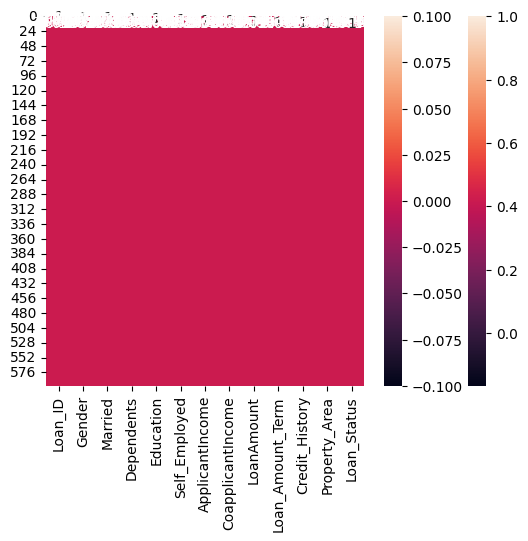

In [267]:
dt.info()

sns.heatmap(dt.isnull())

In [258]:
x = dt.iloc[:,:-1]
y =dt.iloc[:,-1]

In [259]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size =0.3, random_state=42)

In [260]:
forest = RandomForestClassifier()



In [261]:
forest =forest.fit(x_train,y_train)
y_predit = forest.predict(x_test)

[[ 25  31]
 [  7 117]]


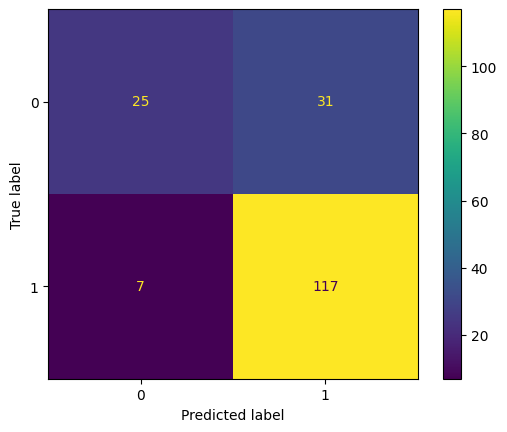

In [262]:
accuracy_score(y_test,y_predit)
print(confusion_matrix(y_test,y_predit))
ConfusionMatrixDisplay.from_estimator(forest, x_test, y_test)

In [263]:
forest = DecisionTreeClassifier()
forest =forest.fit(x_train,y_train)
y_predit = forest.predict(x_test)
accuracy_score(y_test,y_predit)


0.7111111111111111

In [264]:
forest = SVC()
forest =forest.fit(x_train,y_train)
y_predit = forest.predict(x_test)
accuracy_score(y_test,y_predit)

0.6888888888888889

In [265]:
mean_squared_error(y_test,y_predit)

0.3111111111111111

<Axes: >

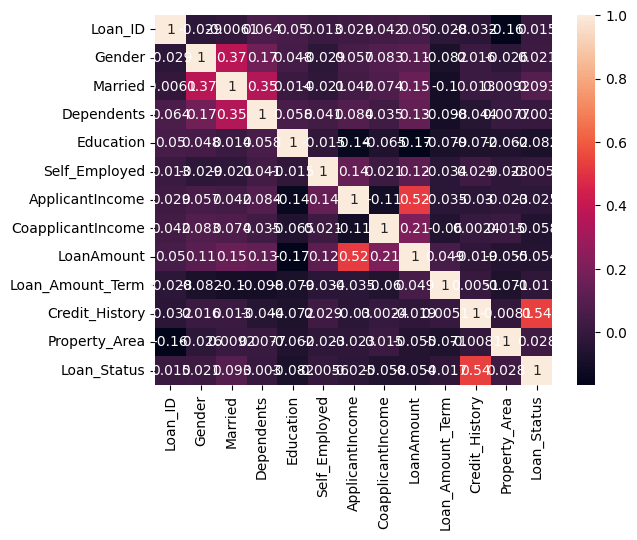

In [268]:
sns.heatmap(dt.corr(), annot = True)